# Trabalho de ICD: UAP(Fenômenos Anômalos Não Identificados)
*Professor: Yuri Malheiros Alunos: Vitoria, Simplicio, Daiellem, Bruno*

### Parte 2:

Na segunda parte do projeto de Introdução a Ciência de Dados nós temos por objetivo iniciar a analise exploratória dos dados. Analisar o dataset, calcular as medidas de centralidades e criar o boxplots das variaveis disponiveis.

In [6]:
import pandas as pd
import numpy as np

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

vamos seguir a sequencia dos datasets do notebook do pré-processamento:

In [8]:
df1 = pd.read_csv("./df1.csv")
df1

,Unnamed: 0,posted,date,time,city,state,shape,duration,summary,images,img_link,lat,lng,population,hour
0,0,03/06/23,03/05/23,2023-10-25 20:47:00,Villas,NJ,Diamond,Few minutes long,Low flying aircraft,Yes,https://nuforc.org/webreports/reports/174/S174...,39.0157,-74.9350,9866,20
1,1,03/06/23,03/05/23,2023-10-25 19:00:00,Mooresville,NC,Orb,10 seconds,Turquoise colored light traveling from south t...,Yes,https://nuforc.org/webreports/reports/174/S174...,35.5847,-80.8266,48431,19
2,2,03/06/23,03/05/23,2023-10-25 12:30:00,Los Angeles,CA,Changing,4 min,Dark object triangular changed shape,Yes,https://nuforc.org/webreports/reports/174/S174...,34.1141,-118.4068,12121244,12
3,3,03/06/23,03/05/23,2023-10-25 00:30:00,Brooklyn,NY,Light,Atleast 10 mins,"Light object sky, In Brooklyn towards Manhattan",Yes,https://nuforc.org/webreports/reports/174/S174...,40.6501,-73.9496,2736074,0
4,4,03/06/23,03/04/23,2023-10-25 23:49:00,Enid,OK,Formation,NaN,It suddenly appeared over rhe neighbors house ...,Yes,https://nuforc.org/webreports/reports/174/S174...,36.4063,-97.8700,51129,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,1312,12/19/21,12/09/21,2023-10-25 04:00:00,Staunton,VA,Circle,>20 minutes,The object was distinctively different than th...,Yes,https://nuforc.org/webreports/reports/165/S165...,38.1593,-79.0611,25358,4
1313,1313,12/19/21,12/03/21,2023-10-25 18:00:00,Wentworth,MO,Cylinder,NaN,Long cylinderical craft with about 15 or 20 wh...,Yes,https://nuforc.org/webreports/reports/165/S165...,36.9932,-94.0756,85,18
1314,1314,12/19/21,09/27/21,2023-10-25 22:00:00,Blowing Rock,NC,Light,NaN,I saw three lights in the sky that approached ...,Yes,https://nuforc.org/webreports/reports/165/S165...,36.1298,-81.6706,1072,22
1315,1315,12/19/21,02/21/20,2023-10-25 19:30:00,Scottsdale,AZ,Other,NaN,Bank of what looked like blacklight screens fl...,Yes,https://nuforc.org/webreports/reports/165/S165...,33.6872,-111.8651,238685,19


O primeiro DataSet tem a maioria das colunas com dados categoricos. Escolhemos, por relevancia, três variáveis de dados categoricos, "city", "state" e "shape", para tirar a medida de centralidade mais indicada para esse tipo de dado, a moda.

In [33]:
df1["city"].mode()

0    Las Vegas
Name: city, dtype: object

In [34]:
freqcity = df1["city"].value_counts()

In [35]:
freqcity.mean()

1.384858044164038

Usei o ".value_counts()" para contar a frenquência de cada cidade contida no DataFrame e atribuie os valores a variavel "a", assim obtemos a média de aparições por cidade.

In [36]:
df1["state"].mode()

0    FL
Name: state, dtype: object

In [37]:
freqState = df1["state"].value_counts()

In [38]:
freqState.mean()

25.823529411764707

Usei o mesmo esquema para saber a media de aparições por estado.

In [39]:
df1["shape"].mode()

0    Circle
Name: shape, dtype: object


Com essas medidas de centralidade obtemos alguns dados importantes a cidade(city) que mais teve aparições foi Las Vegas, o estado foi a Florida(FL) e o formato mais obsevado nas aparições foi circular.


Na variaviel "population" foi possivel obter as 3 medidas de centralidade. Obtivemos a média da população das cidades onde teve aparições, a mediana e a moda. Foi possivel observa a discrepância em relação a media e a mediana, isso pode ser obervado no Boxplot como tem muitos Outliers

In [42]:
df1["population"].mode()

0    2150373
Name: population, dtype: int64

In [43]:
df1["population"].mean()

558924.8762338648

In [44]:
df1["population"].median()

37871.0

<Axes: >

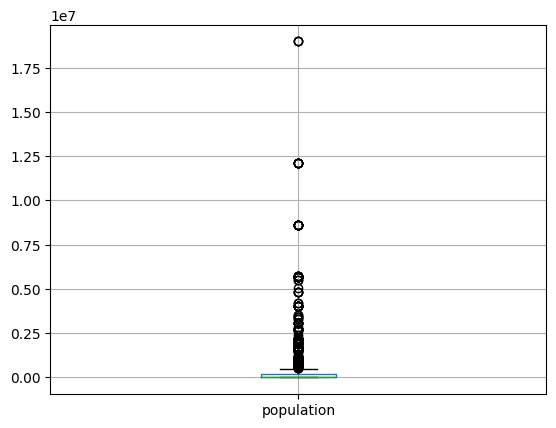

In [4]:
df1.boxplot(column= "population")

Vamos usar o mesmo esquema para os outros dois datasets:

In [5]:
df2 = pd.read_csv("./df2.csv", low_memory=False)
df2

,Unnamed: 0,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,year,month,day,hour
0,0,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949,10,10,20
1,1,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949,10,10,21
2,2,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955,10,10,17
3,3,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956,10,10,21
4,4,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960,10,10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,80327,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444,2013,9,9,21
80328,80328,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500,2013,9,9,22
80329,80329,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444,2013,9,9,22
80330,80330,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556,2013,9,9,22


O segundo DataSet tambem conta com a maioria das colunas com dados categoricos. Escolhemos 'city', 'state/province', 'country', 'UFO_shape'', 'descriptiod' e 'length_of_encounter_seconds' para tirar a moda.



In [48]:
df2["city"].mode()

0    seattle
Name: city, dtype: object

In [49]:
d = df2["city"].value_counts()

In [50]:
d.mean()

4.0367839195979895

Usei o mesmo esquema do primeiro dataframe para obter a média de aparições por cidades.

In [51]:
df2["state/province"].mode()

0    ca
Name: state/province, dtype: object

In [52]:
e = df2["state/province"].value_counts()

In [53]:
e.mean()

1112.4626865671642

Aqui "e" recebe a frequencia de aparições por estado, assim tiramos a média dessa variavel e obtemos a media de aparição por estados.

In [54]:
df2["country"].mode()

0    us
Name: country, dtype: object

In [55]:
f = df2["country"].value_counts()

In [56]:
f.mean()

14132.4

Aqui temos a media por país.

In [57]:
df2["UFO_shape"].mode()

0    light
Name: UFO_shape, dtype: object

In [58]:
df2["description"].mode()

0    Fireball
Name: description, dtype: object

In [59]:
df2["length_of_encounter_seconds"].mode()

0    300
Name: length_of_encounter_seconds, dtype: object

Asssim obtivemos a cidade que teve mais aparições foi Seattle, o estado foi a Callifórnia(CA), o pais com mais aparições foi o Estados Unidos, a forma mais observada do OVNI foi "luz", a descrição mais recorrente foi uma "bola de fogo" e a maioria das aparições foi de 300 segundos.

In [4]:
df3 = pd.read_csv("./df3.csv")
df3

,Unnamed: 0,state,city,colour,shape,mday,month,year,hour,id,...,heatindex,windchill,vis,wdire,dewpt,precip,wspd,hum,wgust,conds
0,0,WA,Olympia,NaN,Formation,14,11,1997,21,NaN,...,NaN,-0.080112,-2.461666,South,-0.867472,NaN,-0.357641,1.598872,NaN,Clear
1,1,WA,Olympia,NaN,Fireball,14,11,1997,21,NaN,...,NaN,-0.080112,-2.461666,South,-0.867472,NaN,-0.357641,1.598872,NaN,Clear
2,3,MD,Salisbury,NaN,Oval,24,11,1997,2,NaN,...,NaN,NaN,-0.493176,North,-0.464073,NaN,-0.911239,0.980525,NaN,Mostly Cloudy
3,4,MD,Salisbury,YELLOW,Oval,24,11,1997,2,NaN,...,NaN,NaN,-0.493176,North,-0.464073,NaN,-0.911239,0.980525,NaN,Mostly Cloudy
4,5,MS,Gulfport,NaN,Triangle,31,12,1997,17,NaN,...,NaN,NaN,2.868935,NNE,-0.968322,NaN,0.373899,-1.207476,NaN,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51825,51865,AZ,Prescott Valley,NaN,Circle,28,1,2000,20,57531.0,...,NaN,-0.192838,0.064273,South,-1.835629,NaN,-0.357641,-0.731823,NaN,Clear
51826,51866,CA,Covina,NaN,Light,27,1,2000,18,57536.0,...,NaN,NaN,-0.771900,North,NaN,NaN,-0.911239,NaN,NaN,Clear
51827,51867,WA,Seattle,NaN,Fireball,26,1,2000,19,57543.0,...,NaN,NaN,0.064273,North,-0.595177,NaN,-0.911239,0.790264,NaN,Mostly Cloudy
51828,51868,TX,Edinburg,NaN,Light,25,1,2000,19,57544.0,...,NaN,NaN,0.064273,ESE,0.635190,NaN,0.373899,0.171916,NaN,Overcast


O terceiro DataSet tambem conta com a maioria das colunas com dados categoricos. Escolhemos, 'state', 'city', 'colour', 'shape', 'mday', 'month', 'year', 'hour's ', 'con para obter a modao As variavies 'mday', 'month', 'year', 'hour' são dados quantitativos, então tiramos suas medias e medianas

In [61]:
df3["state"].mode()

0    CA
Name: state, dtype: object

In [62]:
g = df3["state"].value_counts()

In [63]:
g.mean()

1016.2745098039215

Seguido o exemplo dos dataframes anteriores nesse terceiro, "g" recebe a frequencia  dos estados e tiramos a sua média, assim  obtemos a media de aparições por estado.

In [64]:
df3["city"].mode()

0    Phoenix
Name: city, dtype: object

In [65]:
h = df3["city"].value_counts()

In [66]:
h.mean()

5.859807801017524

In [67]:
df3["colour"].mode()

0    RED
Name: colour, dtype: object

In [68]:
df3["shape"].mode()

0    Light
Name: shape, dtype: object

In [69]:
df3["conds"].mode()

0    Clear
Name: conds, dtype: object

Como resultado o estado de mais aparições foi a Callifórnia(CA), a cidade foi Phoenix, a cor do objeto visto era "verde", tinha forma de "luz"e na maioria das aparições as condições do tempo estavam claras.

In [70]:
df3["year"].mode()

0    2014
Name: year, dtype: int64

In [71]:
df3["year"].mean()

2009.4619332432953

In [72]:
df3["year"].median()

2011.0

<Axes: >

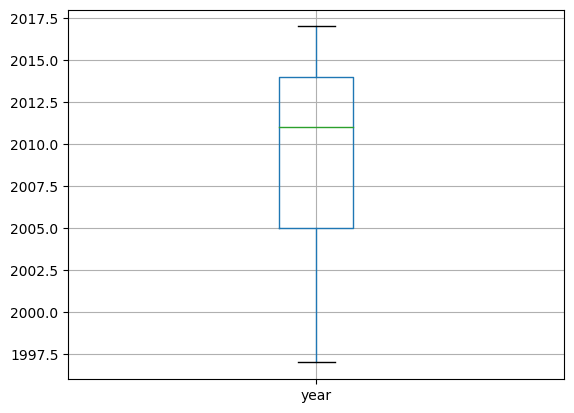

In [5]:
df3.boxplot(column= "year")

Nas variaveis quantitativas que obtivemos medidas de centralidade nos mostra que o ano que teve mais aparições foi em 2014, a media foi, aproximandamente, 2009 e a mediana 2011, observamos pelos numeros e pelo grafico que a uma harmonia na disperção dos dados

In [91]:
df3["month"].mode()

0    7
Name: month, dtype: int64

In [92]:
df3["month"].mean()

6.892649044954659

In [93]:
df3["month"].median()

7.0

In [8]:
df3.boxplot(column= "month")

<Axes: >

In [95]:
df3["mday"].mode()

0    1
Name: mday, dtype: int64

In [96]:
df3["mday"].mean()

15.322265097433919

In [97]:
df3["mday"].median()

15.0

In [9]:
df3.boxplot(column ="mday")

<Axes: >

Na variaveis mês e dias: mês foi julho, a media foi 6,8..., fica entre junho e julho aproximadamente e a mediana foi julho, o dia foi 1, a media foi 15,32... e a mediana foi 15, tambem é possivel observar a harmonia dos dados de centralidade.

In [99]:
df3["hour"].mode()

0    21
Name: hour, dtype: int64

In [100]:
df3["hour"].mean()

16.071039938259695

In [101]:
df3["hour"].median()

20.0

In [10]:
df3.boxplot(column = "hour")

<Axes: >

Na variavel hora houveram mais recorrencias de aparições as 21h, a media foi 16h e a mediana 20h.

Vai ser possivel ter uma melhor visualização desses dados com os graficos nas proximas etapas do projeto.